<a href="https://colab.research.google.com/github/DiegoCorona/DataSource.AI_Competencia_Prediccion_de_Intencion_de_compra/blob/main/DataSource_AI_Intencion_de_compra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de la intención de compra.**

Este proyecto es parte de las **competencias** realizadas por [DataSource.AI](https://www.datasource.ai/es/home/data-science-competitions-for-startups), la cual buscá que los usuarios puedan prácticar la aplicación de técnicas en Ciencia de Datos para resolver problemas prácticos.

Esté proyecto busca analizar el comportamiento de usuarios y predecir la intención de compra en una página web. 

## Descripción

*En esta competencia, analizaremos la actividad de los usuarios que visitan un servicio ofrecido por medio de un sitio web.  El objetivo será predecir que visitantes decidirán comprar de acuerdo a las características e interacciones que ejecuten en la página. Se toman en cuenta datos como Bounce rate, Month, Pages Values, Operating System, Duration, Period Related y muchos más.*

*En este caso especial, tendremos un problema de clasificación.*


El dataset se encuentra aqui: https://www.datasource.ai/es/home/data-science-competitions-for-startups/prediccion-de-la-intencion-de-compra-en-una-pagina-web


## Descripción de los Datos:

El conjunto de datos corresponde a 12.330 sesiones únicas por usuario, las cuales se dividen en

- 8.631 para el conjunto de entrenamiento Train.csv
- 3.699 para el conjunto de test Test.csv

Dicha información fue obtenida a lo largo de 12 meses para evitar tendencias de días especiales o campañas específicas. 


## Definición de las variables: 

- id: ID único del visitante al sitio web
- administrative: Número de veces que el usuario visitó la sección administrativa

- administrative_duration: Tiempo total que el usuario duro en la sección administrativa

- informational: Número de veces que el usuario visitó la sección informativa
- informational_duration: Tiempo total que el usuario duro en la sección informativa

- productrelated: Número de veces que el usuario visitó la sección de productos relacionados

- productrelated_duration: Tiempo total que el usuario duro en la sección de productos relacionados

- bouncerates:  Es el porcentaje de visitantes que ingresan a la página y “rebotan” inmediatamente sin interactuar con ella. Solo se tiene en cuenta esta métrica, si es la primera página que visitan dentro del sitio web.
exitrates: Del número total de visitas a las páginas del sitio web, se obtiene el porcentaje de visitas que cerró sesión a través de esta página específica, es decir, indica el porcentaje de usuarios cuya última visita al sitio web fue esta página específica.

- pagevalues: Es el valor promedio de la página web, indica la contribución que realizó dicha página web para que el visitante llegara a la página o sección final de compra. 

- specialday: Es el valor que indica la cercanía a una fecha especial como lo es por ejemplo el día de San Valentín.  El rango de esta variable es de 0 a 1, siendo 1 el día exacto de la fecha especial y 0 si no hay un rango cercano a dicha fecha.

- month: Mes de la visita al sitio web.

- operatingsystems: Tipo de sistema operativo

- browser: Nombre del explorador web

- region: Región geográfica del visitante

- traffictype: Tipo de tráfico web

- visitortype: Si es un visitante nuevo o un visitante que regresa

- weekend: 0 indica que no es un día del fin de semana y 1 indica que si es un día del fin de semana.

## Variable objetivo:

- revenue: Variable a clasificar, 1 indica que el visitante compró y 0 indica que el visitante no compro.


## **Desarrollo**

Las paqueterías que se van a utilizar son las básicas para Ciencias de Datos: *Pandas, Seaborn, Sklearn*

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
url = '/content/drive/MyDrive/DataSource.AI/Dataset - Intencion de compra/Train.csv'

In [4]:
df = pd.read_csv(url, index_col= 0)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
id,,,,,,,,,,,,,,,,,,
1,0,0.0,0,0.0,5,81.083333,0.04,0.050000,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,0
2,0,0.0,0,0.0,3,189.000000,0.00,0.066667,0.0,0.0,Mar,3,2,8,1,Returning_Visitor,False,0
3,0,0.0,1,132.0,8,445.000000,0.00,0.014286,0.0,0.0,Mar,3,2,4,14,Returning_Visitor,True,0
4,0,0.0,0,0.0,3,0.000000,0.20,0.200000,0.0,0.0,Mar,1,8,2,1,Returning_Visitor,False,0
5,0,0.0,0,0.0,4,14.000000,0.10,0.150000,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,0


La proporción de registros que terminaron en una compra en la página web fue de solamente el 15%, esto nos habla de una base de datos desbalanceada y sesgada hacía la clase '0', es decir, por la clase donde no se produjo una compra. 

También esta información nos indica que tomar en cuenta metricas como *accuracy* no es conveniente.

In [5]:
print('tamaño: ', len(df['Administrative']))
df['revenue'].value_counts()

tamaño:  8631


0    7298
1    1333
Name: revenue, dtype: int64

In [6]:
df['revenue'].value_counts()/len(df['revenue'])

0    0.845557
1    0.154443
Name: revenue, dtype: float64

Se nota la presencia de algunos datos atípicos en las columnas *Administrative, Administrative_duration, Informational, Informational_duration*, pero de momento se trabajará con el dataset original.

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,revenue
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,2.302398,80.509877,0.508748,34.314914,31.697718,1195.706056,0.021485,0.042400,5.931044,0.059761,2.116672,2.357201,3.149345,4.073224,0.154443
std,3.291140,173.090680,1.280891,135.652626,44.379155,1828.486623,0.047272,0.047634,18.839500,0.196143,0.902649,1.717329,2.408908,4.023450,0.361394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,186.475000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.625000,0.000000,0.000000,18.000000,602.883333,0.003030,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,91.950000,0.000000,0.000000,37.000000,1477.564759,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,2720.500000,24.000000,2195.300000,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [8]:
X = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

y = df['revenue']

In [9]:
X = pd.get_dummies(X)  #### VisitorType se dividio (get_dummies)
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
id,,,,,,,,,,,,,,,,,,
1,0,0.000000,0,0.0,5,81.083333,0.04,0.050000,0.000,0.0,3,2,1,2,False,1,0,0
2,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,3,2,8,1,False,0,0,1
3,0,0.000000,1,132.0,8,445.000000,0.00,0.014286,0.000,0.0,3,2,4,14,True,0,0,1
4,0,0.000000,0,0.0,3,0.000000,0.20,0.200000,0.000,0.0,1,8,2,1,False,0,0,1
5,0,0.000000,0,0.0,4,14.000000,0.10,0.150000,0.000,0.0,3,2,1,1,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,14,1005.608333,0,0.0,25,732.344872,0.00,0.015676,0.000,0.0,3,2,1,2,False,0,0,1
8628,0,0.000000,0,0.0,14,340.000000,0.00,0.015385,23.388,0.0,2,2,3,1,True,0,0,1
8629,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,2,2,3,4,False,0,0,1


Tenemos un dataser desbalanceado: 

- 85% son cero, es decir, el cliente **NO** compro en la página.
- 15% son unos, el cliente realizó una compra.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [11]:
y_train.value_counts()

0    5496
1     977
Name: revenue, dtype: int64

Para resolver el problema del desbalanceo vamos a utilizar técnicas de muestreo para tratar de obtener la misma proporción de registros en ambas clases.

## *Sobremuentreo de la clase 1.*

Primero, existen muchas técnicas para realizar lo anterior, y se pueden explicar de manera resumida: 

### *Métodos de sobremuestreo.*

- **Método ROS**: Este método replica muestras de la clase menos representadas hasta obtener la misma porporción con la clase con mayor presentación.

- **Método SMOTE**: Este método, adiferencia del anterior, crea muestras sintéticas de las clases menos representadas. Estos nuevos registros provienen de calcular la media entre dos registros en la misma clase. Hay que notar que notas las caractéristicas deben ser númericas para poder realizar el calculo de las medias.

### *Métodos de submuestreo.*

- **Método RUS**: El método elimina registros de manera aleatoria de la clase más representada hasta que las proporciones entre las clases sea la misma.

- **Método NearMiss**: Este también elimina muestras de la clase más representada hasta obtener la misma proporción con la clase menos representada, la diferencia con el método anterior es que la eliminación no es aleatoria, sino que se eliminan las muestras que se encuentran más 'cerca' a la clase menos represnetada. 

#### **Método ROS**, duplicar muestras de la clase menos representadas

In [12]:
#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()#random_state = 0
#SMOTE
smote = SMOTE(random_state = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
#ROS. Duplica muestras de la clase menos representadas
dataRos, targetRos = ros.fit_resample(X_train ,y_train)
Unos = targetRos.sum()
Ceros = targetRos.shape[0]- Unos
print('Compras: ', Unos, ' , No compras: ', Ceros)
dataRos.shape

Compras:  5496  , No compras:  5496


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(10992, 18)

In [14]:
dataRos

array([[0, 0.0, 0, ..., 0, 0, 1],
       [0, 0.0, 1, ..., 0, 0, 1],
       [0, 0.0, 0, ..., 0, 0, 1],
       ...,
       [3, 137.0, 4, ..., 1, 0, 0],
       [5, 39.0, 0, ..., 1, 0, 0],
       [6, 65.41666667, 0, ..., 0, 0, 1]], dtype=object)

#### **Método SMOTE**, genera muestras sinteticas de la clase con menos representación, a partir de las mismas muestras.

In [15]:
#SMOTE. Genera nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(X_train ,y_train)
Compras = targetSmote.sum()
No_compras = targetSmote.shape[0]- Compras
print('Compras: ', Compras, ' , No_compras: ', No_compras)
dataSmote

Compras:  5496  , No_compras:  5496


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.        ,   0.        ,   1.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       ...,
       [  3.11532144, 254.30281462,   0.72116964, ...,   0.        ,
          0.        ,   1.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [  3.        ,  27.17684944,   0.        , ...,   0.29834639,
          0.        ,   0.70165361]])

### SUbmuestreo de la clase con más representación

### **Método RUS**, eliminación de muestras de la clase con más representatividad de manera aleatoria

In [16]:
#Importamos los paquetes
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#Inicialización de los métodos de submuestreo
#RUS
rus = RandomUnderSampler()#random_state = 0
#NearMiss
nm = NearMiss()

In [17]:
#RUS. Elimina muestras de la clase más representada aleatoriamente
dataRus, targetRus = rus.fit_resample(X_train ,y_train)
ComprasRus = targetRus.sum()
NoComprasRus = targetRus.shape[0]- ComprasRus
print('ComprasRus: ', ComprasRus, ' , NO_ComprasRus: ', NoComprasRus )
dataRus

ComprasRus:  977  , NO_ComprasRus:  977


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[2, 6.0, 0, ..., 0, 0, 1],
       [1, 11.0, 0, ..., 0, 0, 1],
       [0, 0.0, 0, ..., 0, 0, 1],
       ...,
       [4, 143.0, 1, ..., 0, 0, 1],
       [5, 61.875, 0, ..., 0, 0, 1],
       [2, 268.08, 0, ..., 0, 0, 1]], dtype=object)

### **Método NearMiss**, Elimina las muestras de la clase más representada quitando aquellas que estan más cerca de la clase menos representada

In [18]:
#NearMiss. Elimina las muestras más cercanas de la clase más representada
dataNm, targetNm = nm.fit_resample(X_train ,y_train)
ComprasNm = targetNm.sum()
NoComprasNm = targetNm.shape[0]- ComprasNm
print('ComprasNm: ', ComprasNm, ' , NoComprasNm: ', NoComprasNm)
dataNm

ComprasNm:  977  , NoComprasNm:  977


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[  1.   ,  21.2  ,   0.   , ...,   0.   ,   0.   ,   1.   ],
       [  2.   ,  23.2  ,   0.   , ...,   1.   ,   0.   ,   0.   ],
       [  1.   ,  20.   ,   0.   , ...,   0.   ,   0.   ,   1.   ],
       ...,
       [  4.   , 143.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  5.   ,  61.875,   0.   , ...,   0.   ,   0.   ,   1.   ],
       [  2.   , 268.08 ,   0.   , ...,   0.   ,   0.   ,   1.   ]])

## **Submuestreo y Sobremuestreo**

**Método SMOTETomek**, combina el método SMOTE seguido de un submuestreo con Uniones de Tomek

In [19]:
#Importamos los paquetes
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek
smoteT = SMOTETomek()#random_state = 0

In [20]:
#Smote-Tomek. Sobremuestreo con Smote seguido de un submuestreo con Uniones de Tomek
datasmoteT, targetsmoteT = smoteT.fit_resample(X_train ,y_train)
ComprasosmoteT = targetsmoteT.sum()
NoComprasosmoteT = targetsmoteT.shape[0]- ComprasosmoteT
print('ComprasosmoteT: ', ComprasosmoteT, ' , NoComprasosmoteT: ',ComprasosmoteT )
datasmoteT

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ComprasosmoteT:  5371  , NoComprasosmoteT:  5371


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.        ,   0.        ,   1.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [  0.39437241,   5.52121379,   0.        , ...,   0.60562759,
          0.        ,   0.39437241],
       [  9.        , 263.00913637,   0.        , ...,   0.        ,
          0.        ,   1.        ]])

## **Entrenando el módelo.**

Se utilizará una **Máquina de Soporte de Vectores (SVM)**, la cual tiene como fundamento técnico crear una línea de división entre las clases (venta o no venta) de modo que la distancia de cada registro en cada clase sea la máxima posible a la línea de decisión.

También cabe señalar que se usará el sobremuetreo **Smote**, solo en el set de entrenamiento, esto para dar un poco de variabilidad a las muestras y que esta misma variabilidad pueda ser captada por el modelo.

#### Solo trabajamos con X_train y y_train

Aplico PCA para reducir la dimensión a solo dos variables y realizar un scattertplot para tratar de vizualizar si los cluster se pueden separar de manera lineal o no lineal.


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#dataSmote, targetSmote

In [22]:
X_normalizaed = StandardScaler().fit(dataSmote).transform(dataSmote)

In [23]:
pca = PCA(n_components= 2).fit(X_normalizaed)
X_pca = pca.transform(X_normalizaed)

In [24]:
X_pca

array([[-1.19840971, -0.72037306],
       [-1.30458794, -1.16901907],
       [-2.10494554, -2.35374464],
       ...,
       [ 0.65083371, -1.13036014],
       [ 0.57641286, -0.48995805],
       [-0.60535732,  0.68554701]])

In [25]:
df_pca = pd.DataFrame.from_records(X_pca, columns = ['v1', 'v2'])
df_pca.head()

,v1,v2
0,-1.198410,-0.720373
1,-1.304588,-1.169019
2,-2.104946,-2.353745
3,-1.354015,3.062104
4,-1.100147,-0.871334


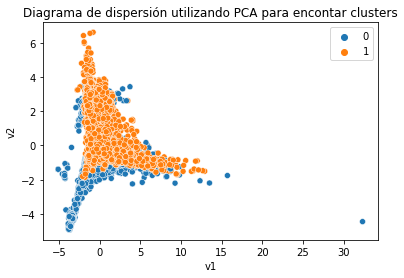

In [32]:
sns.scatterplot(x = df_pca['v1'], y = df_pca['v2'], hue = targetSmote ).set_title('Diagrama de dispersión utilizando PCA para encontar clusters');

Probamos ajustar el modelo de SVM con los parámetros por defecto en python.


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [35]:
model = SVC()

In [36]:
model.fit(dataSmote, targetSmote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
print('Precision en el set de entranamiento: ', precision_score(targetSmote, model.predict(dataSmote)))
print('Recall en el set de entranamiento: ', recall_score(targetSmote, model.predict(dataSmote)))
print('Precision en el set de prueba: ', precision_score(y_test, model.predict(X_test)))
print('Recall en el set de prueba: ', recall_score(y_test, model.predict(X_test)))
print('-'*100)
print('f1_score en el set de prueba', f1_score(y_test, model.predict(X_test)))

Precision en el set de entranamiento:  0.6911811524992041
Recall en el set de entranamiento:  0.7900291120815138
Precision en el set de prueba:  0.2978494623655914
Recall en el set de prueba:  0.7780898876404494
----------------------------------------------------------------------------------------------------
f1_score en el set de prueba 0.4307931570762053


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, 

In [ ]:
predictions = model.predict(X_test)

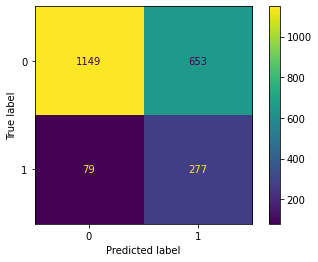

In [41]:
plot_confusion_matrix(model, X_test, y_test, values_format='.6g')  
plt.show()

Tomando como metrica de optimización AUC, el área bajo la curva con este ajuste es 0.70 en el set de prueba, cosa que no esta nada mal.

In [ ]:
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7078573744528552


#### Hiperparametrización optimizando la **f1_macro**

Hiperparametrizamos el modelo, para probar con diversos valor de regularización. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_basic = SVC()
#dataSmote, targetSmote

In [ ]:
params = {'C': [0.01, 0.1, 1, 5, 10, 15, 25, 50, 75, 100, 125, 145, 160, 175, 200]}

In [ ]:
final = GridSearchCV(model_basic, param_grid= params, cv = 3, scoring= 'f1_macro')

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
final.fit(dataSmote, targetSmote)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 15, 25, 50, 75, 100, 125,
                               145, 160, 175, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
final.best_params_

{'C': 200}

In [ ]:
final.

make_scorer(f1_score, average=binary)

In [ ]:
pred = final.predict(X_test)

In [ ]:
print('Precision en el set de entranamiento: ', precision_score(targetSmote, final.predict(dataSmote)))
print('Recall en el set de entranamiento: ', recall_score(targetSmote, final.predict(dataSmote)))
print('Precision en el set de prueba: ', precision_score(y_test, final.predict(X_test)))
print('Recall en el set de prueba: ', recall_score(y_test, final.predict(X_test)))
print('-'*100)
print('f1_score: ', f1_score(y_test, final.predict(X_test)))

Precision en el set de entranamiento:  0.8861043194784026
Recall en el set de entranamiento:  0.7913027656477438
Precision en el set de prueba:  0.5820224719101124
Recall en el set de prueba:  0.7275280898876404
----------------------------------------------------------------------------------------------------
f1_score:  0.6466916354556804


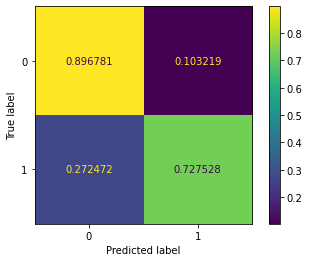

In [ ]:
plot_confusion_matrix(final, X_test, y_test, values_format='.6g', normalize= 'true')  
plt.show()

AUnque se optimizó con un valor de regularización un poco grande el AUC presentador por este modelo en el set de prueba mejoró a 0.81, lo cual es un desempeño excelente.

In [ ]:
print('AUC: ', roc_auc_score(y_test, pred))

AUC:  0.8121547219693475


### Probando en el set de prueba

Ya solo queda probarlo con ejemplos nuevos para la competencia.

In [ ]:
link = '/content/drive/MyDrive/DataSource.AI/Dataset - Intencion de compra/Test.csv'


In [ ]:
test = pd.read_csv(link, index_col= 0)

In [ ]:
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
id,,,,,,,,,,,,,,,,,
1,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,Nov,1,8,6,11,Returning_Visitor,False
2,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,Mar,2,2,3,2,Returning_Visitor,False
3,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,Nov,2,2,2,2,Returning_Visitor,False
4,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,Aug,2,5,7,4,Returning_Visitor,False
5,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,Aug,2,2,3,1,Returning_Visitor,True


In [ ]:
test.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [ ]:
test = test[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

In [ ]:
test = pd.get_dummies(test)

In [ ]:
test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
id,,,,,,,,,,,,,,,,,,
1,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,1,8,6,11,False,0,0,1
2,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,2,2,3,2,False,0,0,1
3,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,2,2,2,2,False,0,0,1
4,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,2,5,7,4,False,0,0,1
5,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,2,2,3,1,True,0,0,1


In [ ]:
X.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
test_predictions = final.predict(test)

In [ ]:
test_predictions.shape

(3699,)

In [ ]:
id = []
for i in range(1, len(test_predictions)+1):
  id.append(i)


In [ ]:
len(test_predictions)

3699

In [ ]:
len(id)

3699

In [ ]:
test_df = pd.DataFrame({'id' : id, 'revenue': test_predictions})

In [ ]:
test_df

,id,revenue
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1
...,...,...
3694,3695,0
3695,3696,1
3696,3697,0
3697,3698,1


In [ ]:
test_df.to_csv('/content/drive/MyDrive/DataSource.AI/Dataset - Intencion de compra/test_final_6.csv', index= 'id')

## **Nota**:

Desempeño de muestreo en ambos sets (SMOTE), f1_macro : 0.586028409367545

Desempeño de muestreo solo en train set (SMOTE) C = 100, gamma = 0.01, f1_macro : 0.60391377880048

Desempeño de muestreo solo en train set (SMOTE) C = 100, f1_macro : 0.774231853278021

Desempeño de muestreo solo en train set (SMOTE) C = 145, f1_macro : 0.7815335791417234

Desempeño de muestreo solo en train set (SMOTE) C = 200, f1_macro : 0.782270935694076, 0.7800861244079026  Random_state = 1